<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

In [1]:
# Cargar todas las librerías
import pandas as pd
from math import factorial
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carga el dataset en un DataFrame
df = pd.read_csv('/datasets/games.csv')


# Mostrar información general del dataset
print("Información general del dataset:\n")
print(df.info())
print("\n------------------------------------")
print (df.head())

Información general del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

------------------------------------
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1 

# Notas Paso 2: Preparación de datos

# 1 Formato nombre de columnas
# Los nombres de columnas tienen letras capitales, y se necesitan en minúsculas

# 2 Tipo de dato
# El tipo de dato de la columna Year_of_Release es float64, debería ser tipo fecha o int64, y el tipo de dato de User_Score debería ser float64.

# 3 Valores nulos/ausentes
# El máximo de datos por columnas es 16715, por lo que hay datos faltantes en la columna Name, Year_of_Release, Genre, Critic_Score, User_Score y Rating.

# 4 Valores duplicados
# Identificar valores duplicados

In [3]:
# Modificaciones -----------------------------------------

# 1 Formato nombre de columnas
# Reemplazar nombres de columnas a minusculas
df.columns=df.columns.str.lower()
print("Nombres de columnas en minúsculas")
print(df.columns)
print("\n------------------------")

# 2 Tipo de dato
# Convertir "tbd" a tipo numero y remplazar por NA
df['user_score']=df['user_score'].replace('tbd',pd.NA)
# Convertir User_Score a float64
df['user_score']=pd.to_numeric(df['user_score'],errors='coerce')

# Convertir Year_of_Release a Int64, que permite valores nulos
df['year_of_release']=df['year_of_release'].astype('Int64')
print(df.dtypes)

Nombres de columnas en minúsculas
Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

------------------------
name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object


In [4]:
# 3 Valores nulos/ausentes
# Identificar y contar valores nulos

print("Valores ausentes encontrados:")
nulos=df.isnull()
filas_nulos=df[nulos.any(axis=1)]
print(filas_nulos.head())

print("\n-------------------------")
print("Conteo de valores nulos")
valores_ausentes=df.isnull().sum()
print(valores_ausentes[valores_ausentes>0].sort_values(ascending=True))

Valores ausentes encontrados:
                        name platform  year_of_release         genre  \
1          Super Mario Bros.      NES             1985      Platform   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
9                  Duck Hunt      NES             1984       Shooter   
10                Nintendogs       DS             2005    Simulation   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  
1      29.08      3.58      6.81         0.77           NaN         NaN    NaN  
4      11.27      8.89     10.22         1.00           NaN         NaN    NaN  
5      23.20      2.26      4.22         0.58           NaN         NaN    NaN  
9      26.93      0.63      0.28         0.47           NaN         NaN    NaN  
10      9.05     10.95      1.93         2.74           NaN         NaN    NaN  

-------------------------
Conteo de valores nulos


In [5]:
# 4 Valores duplicados

#Identificar filas duplicadas que son identificas en todas las columnas

total_duplicates= df.duplicated().sum()
if total_duplicates > 0:
    print(f"Total de filas duplicadas:{total_duplicates}")
    print("\n")
    print("Muestra de filas duplicadas")
    print(df[df.duplicated(keep=False)].head())
else:
    print("No hay valores duplicados")

No hay valores duplicados


In [6]:
# Modificaciones -----------------------------------------
# 3 Valores nulos/ausentes
#Columna name: filtrar y mostrar las filas con valores nulos
filas_nulas_name=df.loc[df['name'].isnull()]
print(f"Filas con valores nulos en la columna name:\n{filas_nulas_name}")


Filas con valores nulos en la columna name:
      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


In [7]:
# Reemplazar los valores nulos en las columnas name y genre
# Se rellenaron con Unknown y Missing para poder excluirlos después, 
#estos valores son ausentes posiblemente por error de captura o falta de información

df['name'] = df['name'].fillna('Unknown')
df['genre'] = df['genre'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Missing')
# Verificar modificación de valores nulos
print("Verificación de valores nulos:")
print(df[['name','genre','rating']].isnull().sum())
print("\n------------------------------")

# Reemplazar valores ausentes en columna year_of_release con el promedio
year_mean=df['year_of_release'].mean()
year_mode=df['year_of_release'].mode()[0]
year_median=df['year_of_release'].median()
print(f"Year of release statistics: media {year_mean}, median {year_median}, moda{year_mode}")
print("\nVerificación de valores nulos:")

#Elegí la mediana porque es el numero que se encuentra en la mitad de los datos y es cercano a la media y la moda.
df['year_of_release']=df['year_of_release'].fillna(year_median).astype('Int64')
print(df[['year_of_release']].isnull().sum())

#Los valores ausentes en la columna de critic_score y user_score se dejaran para futuros cálculos, en donde se pueden excluir automáticamente.
# Los valores ausentes en esas columnas pueden ser porque aun no han sido evaluados esos videojuegos.

# 4 Valores duplicados
# No se encontraron valores duplicados.

Verificación de valores nulos:
name      0
genre     0
rating    0
dtype: int64

------------------------------
Year of release statistics: media 2006.4846163200777, median 2007.0, moda2008

Verificación de valores nulos:
year_of_release    0
dtype: int64


In [8]:
#Calcular ventas totales para cada juego en todas las regiones

# Seleccionar las columnas de ventas regionales
sales_columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

# Sumar las columnas de ventas por fila (axis=1) y asignar el resultado a una nueva columna
df['total_sales'] = df[sales_columns].sum(axis=1)

# Mostrar las primeras filas con la nueva columna para verificar el cálculo
print("DataFrame con la nueva columna de ventas totales:")
df_sorted = df.sort_values(by='total_sales', ascending=False)
print(df_sorted[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head(10))

DataFrame con la nueva columna de ventas totales:
                        name  na_sales  eu_sales  jp_sales  other_sales  \
0                 Wii Sports     41.36     28.96      3.77         8.45   
1          Super Mario Bros.     29.08      3.58      6.81         0.77   
2             Mario Kart Wii     15.68     12.76      3.79         3.29   
3          Wii Sports Resort     15.61     10.93      3.28         2.95   
4   Pokemon Red/Pokemon Blue     11.27      8.89     10.22         1.00   
5                     Tetris     23.20      2.26      4.22         0.58   
6      New Super Mario Bros.     11.28      9.14      6.50         2.88   
7                   Wii Play     13.96      9.18      2.93         2.84   
8  New Super Mario Bros. Wii     14.44      6.94      4.70         2.24   
9                  Duck Hunt     26.93      0.63      0.28         0.47   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38  
5        30.26  
6    

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Hiciste un buen trabajo al cambiar los nombres de las columnas, sus tipos de datos y reemplazar los valores ausentes
</div>


# Notas paso 3
# Gráfico 1: distribución de juegos lanzados por año
# Gráfico 2: distribución de las ventas anuales de las plataformas 
# Gráfico 3: barras de plataformas líderes en ventas
# Gráfico 4: diagrama de caja para las ventas globales de los juegos desglosados por plataforma.
# Gráfico 5: dispersión de reseñas y ventas y línea de correlación
# Gráfico 6: barras comparación de ventas de los top 3 de cada videojuego por Plataforma
# Gráfico 7: distribución general de los juegos por género


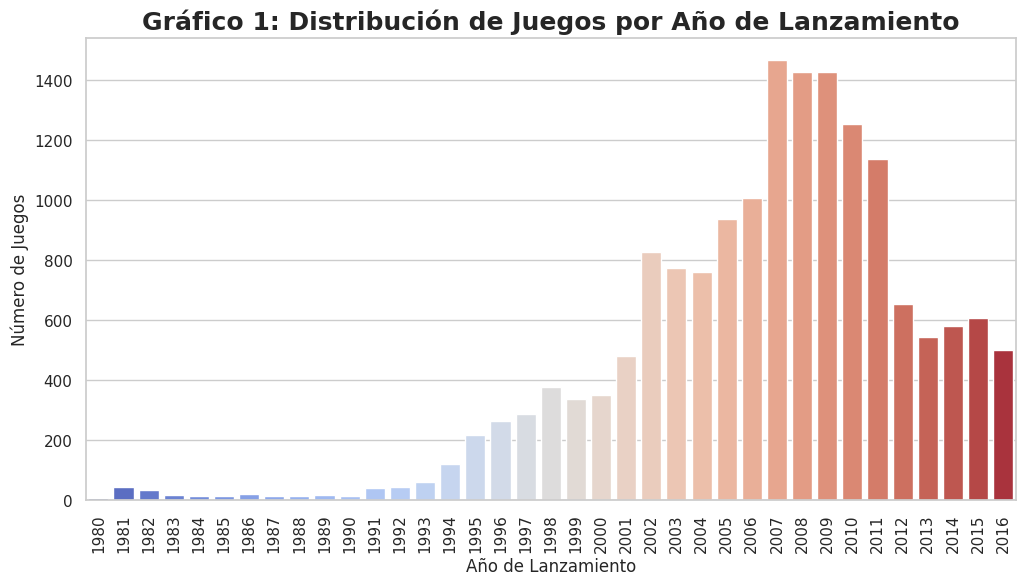

In [10]:
# Análisis de distribución de los juegos

# Gráfico 1: Juegos lanzados por año
sns.set(style="whitegrid")
# Conteo de juegos por año
juegos_por_año = df.groupby('year_of_release')['name'].count()

plt.figure(figsize=(12, 6))
sns.barplot(x=juegos_por_año.index, y=juegos_por_año.values, palette='coolwarm')
plt.title('Gráfico 1: Distribución de Juegos por Año de Lanzamiento',fontsize=18, fontweight='bold')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=90)
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de presentar los datos, podemos ver claramente la tendencia de los videojuegos con un incremento constante en años anteriores que ha empezado a ir en declive en los últimos años
</div>


# Los años con más lanzamientos estan entre 2007 y 2011, con un número de juegos superior a 1000 por año.
# Aunque el 2007 fue el año que se reemplazo por los valores ausentes, y se puede ver que el máximo año con juegos es 2007 cerca de 1500.
# Por lo tanto se puede determinar que los año con más juegos lanzados es 2008 y 2009.
# También se puede ver, el número de juegos se dispara al inicio de la década de los 90's.
# La disminución de los juegos lanzados se ve despues del 2012, puede ser por datos faltantes. 
# En los primeros años también puede ser incompletos.
# Se eligió este gráfico de barras para visualizar la distribución del conteo juegos lanzados por año.

Top 10 Plataformas por Ventas Totales:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


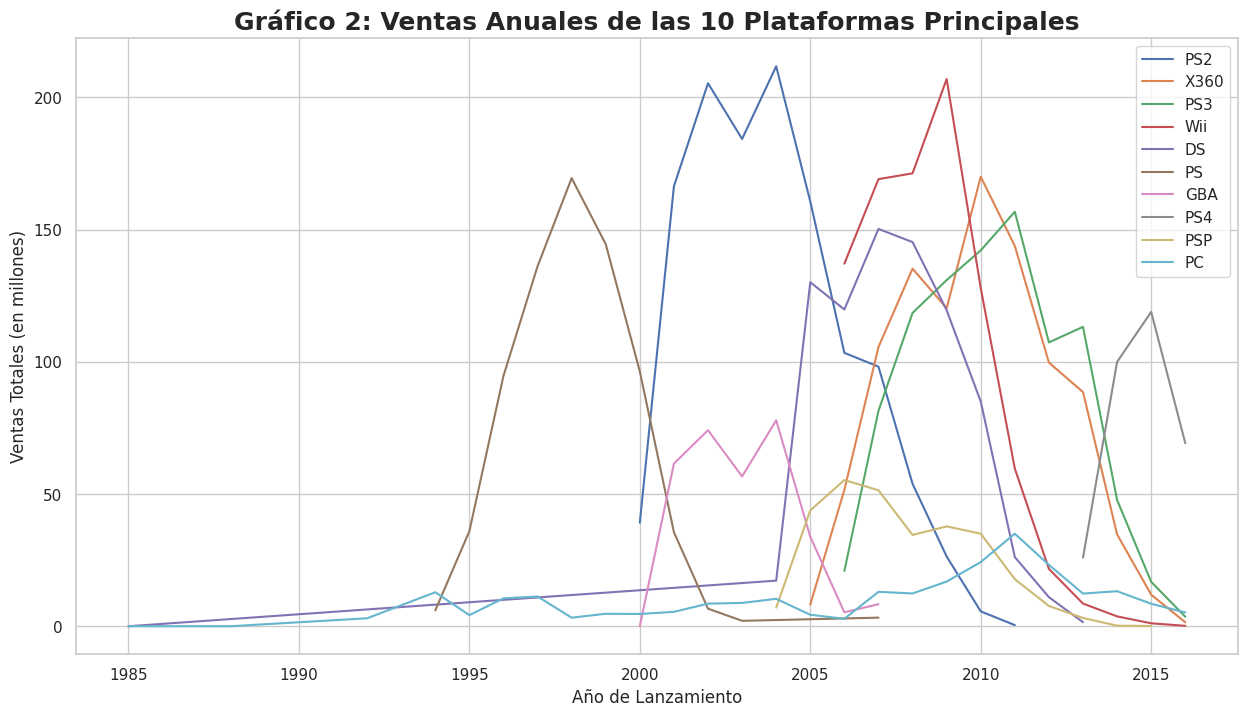

In [11]:
# Gráfico 2: distribución de las ventas anuales de las plataforma 
# Selección top10 de plataformas con mas ventas
ventas_por_plataforma = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print("Top 10 Plataformas por Ventas Totales:")
print(ventas_por_plataforma.head(10))

# Distribución de ventas anuales para las plataformas principales
top_platforms = ventas_por_plataforma.head(10).index.tolist()

plt.figure(figsize=(15, 8))
for platform in top_platforms:
    # Filtrae los datos para cada plataforma
    platform_data = df[df['platform'] == platform]
    # Agrupar las ventas por año
    sales_by_year = platform_data.groupby('year_of_release')['total_sales'].sum()
    sns.lineplot(x=sales_by_year.index, y=sales_by_year.values, label=platform)

plt.title('Gráfico 2: Ventas Anuales de las 10 Plataformas Principales',fontsize=18, fontweight='bold')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (en millones)')
plt.legend()
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Buena manera de mostrar los datos, gracias a la gráfica podemos observar el tiempo de vida de cada una de las plataformas
</div>


# Se puede ver que varias plataformas mostraron ventas altas cerca del año 2010 después de haberse lanzado en el año 2005 , como es X360.
# Después tuvo un descenso hasta llegar al mínimo en el 2015.
# La plataforma PS5, tuvo un lanzamiento cerca del 2013,alcanza el pico hasta el 2015, despues de 2-3 años.
# Las plataformas que tienen picos máximos, lo alcanzaron igual despues de 2-3 años desde el lanzamiento, y luego disminuye las ventas drásticamente. 
# Las plataformas que iniciaron desde los 80's perduraron hasta 2016-2017.
# Se eligió el gráfico de líneas para ver el ciclo de crecimiento de la plataforma.

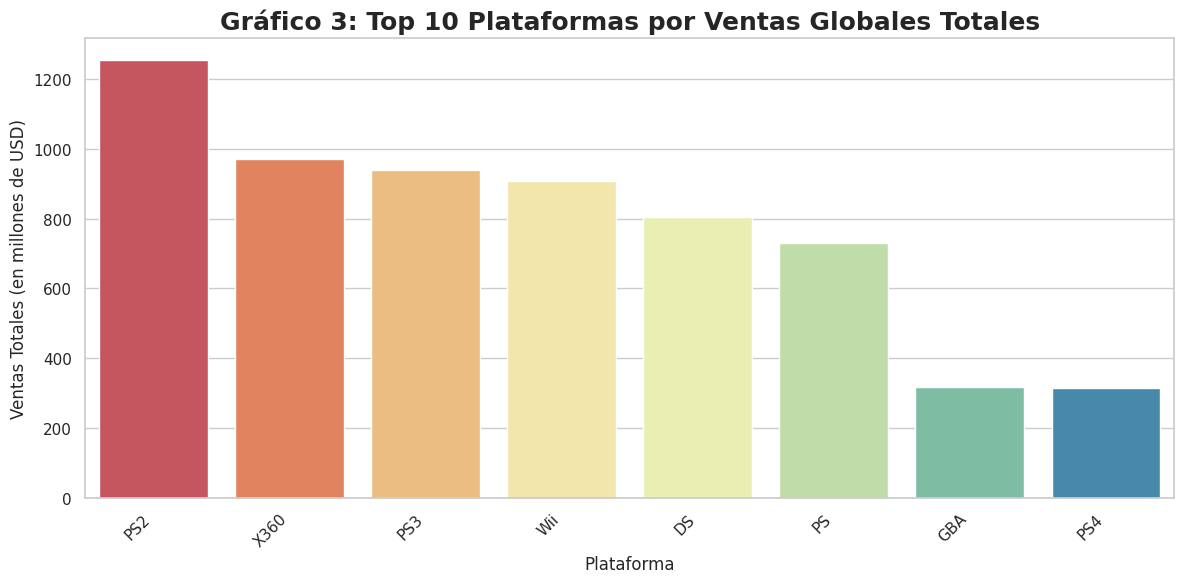

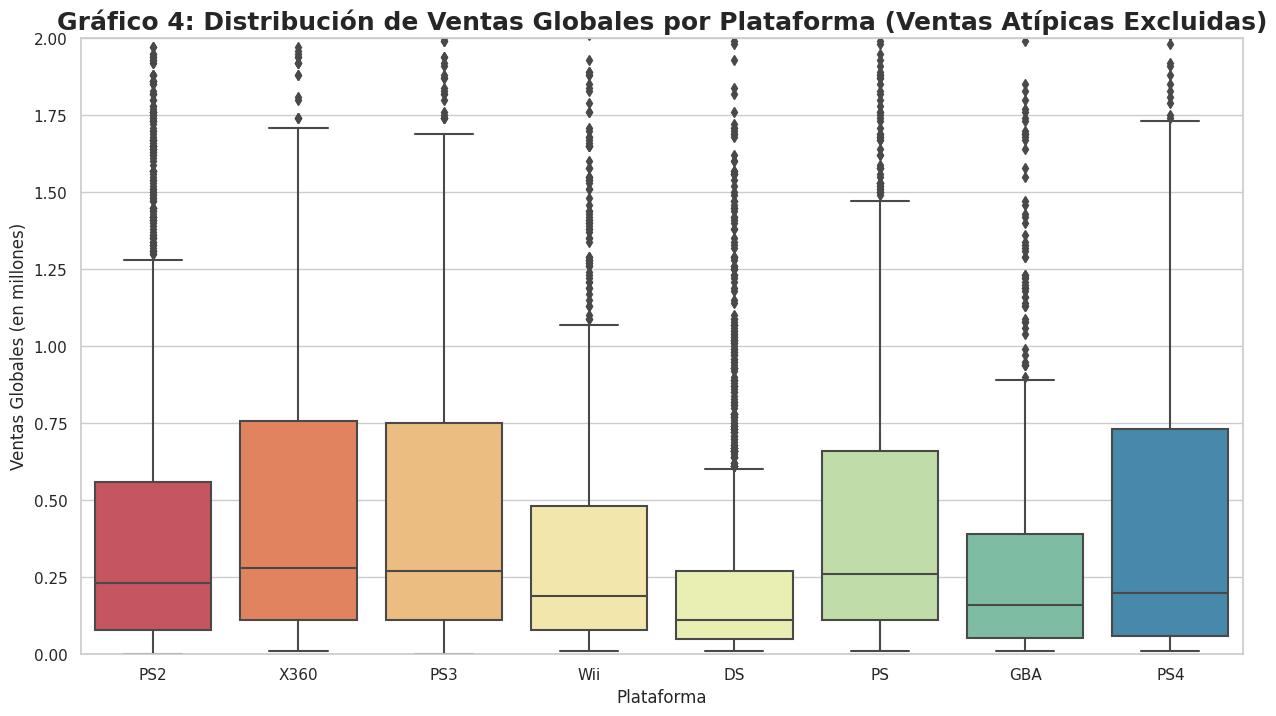

In [12]:
# Gráfico 3: barras de plataformas líderes en ventas
# Las plataformas líderes en ese periodo son Wii, PS3, X360, PSP, PS4, y DS. 
# Para la siguiente gráfica se usaran los primeras 8.
# Para las siguientes gráficas el periodo que se utilizará será del 2005 al 2017, 
# debido a que hay un número mayor de plataformas que alcanzaron el pico cerca del 2010.
# Las plataformas líderes en ese periodo son Wii, PS3, X360, PSP, PS4, y DS. 

top_platforms = ventas_por_plataforma.head(8)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6)) 
sns.barplot(x=top_platforms.index, y=top_platforms.values, palette='Spectral')
plt.title('Gráfico 3: Top 10 Plataformas por Ventas Globales Totales', fontsize=18, fontweight='bold')
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales (en millones de USD)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje X para mejor lectura
plt.tight_layout() # Ajusta el diseño para que todo quepa
plt.show()

# Gráfico 4: diagrama de caja para las ventas globales de los juegos desglosados por plataforma.
# Para la siguiente gráfica se usaran los primeras 8.
top_platforms = ventas_por_plataforma.head(8).index.tolist()
df_top_platforms = df[df['platform'].isin(top_platforms)]
plt.figure(figsize=(15, 8))
sns.boxplot(x='platform', y='total_sales', data=df_top_platforms, order=top_platforms, palette='Spectral')
plt.ylim(0, 2)
plt.title('Gráfico 4: Distribución de Ventas Globales por Plataforma (Ventas Atípicas Excluidas)', fontsize=18, fontweight='bold')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

El diagrama de caja nos muestra como en algunas plataformas las ventas estan consolidadas mientras que en otras consolas las ventas son muy disparejas lo que incrementa el rango intercuartil

Una alternativa a usar `ylim` es utilizar el parametro `showfliers = False`, el cual se encarga de los outliers, te dejo el ejemplo en la celda de abajo
</div>

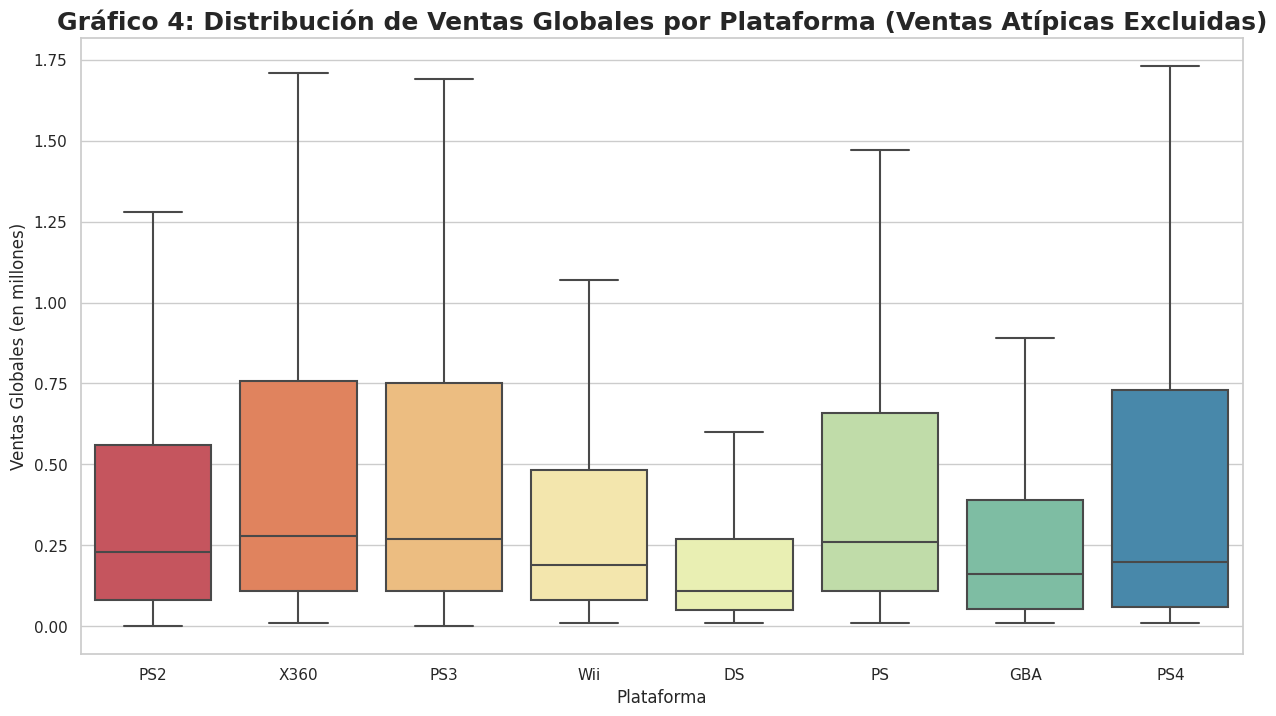

In [13]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='platform', y='total_sales', data=df_top_platforms, order=top_platforms, palette='Spectral', showfliers = False) # Se agrega nuevo parametro
#plt.ylim(0, 2) # No es necesario
plt.title('Gráfico 4: Distribución de Ventas Globales por Plataforma (Ventas Atípicas Excluidas)', fontsize=18, fontweight='bold')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.show()

# la plataforma que más tiene valores atípicos (outliners) es DS, pero con menor variación entre los datos.
# La plataforma PS2 es la plataforma con más ventas, tiene una media cerca a 0.25 millones USD de ventas totales, otras plataformas como X60, PS3, y PS, 
# tienen medias similares a 0.25 millones USD, pero con un rango mayor.
# Las plataformas Wii, DS, GBA, y PS4, tiene medias inferiores a 0.25 millones USD de ventas.
# Se puede ver que la distribución de los datos para cada plataforma es asimétrica positiva, con cola hacia la derecha.
# También se puede determinar que las plataformas, tienen la mayoría de ventas por montos pequeños, que de montos granes, como se muestra en las gráficas.

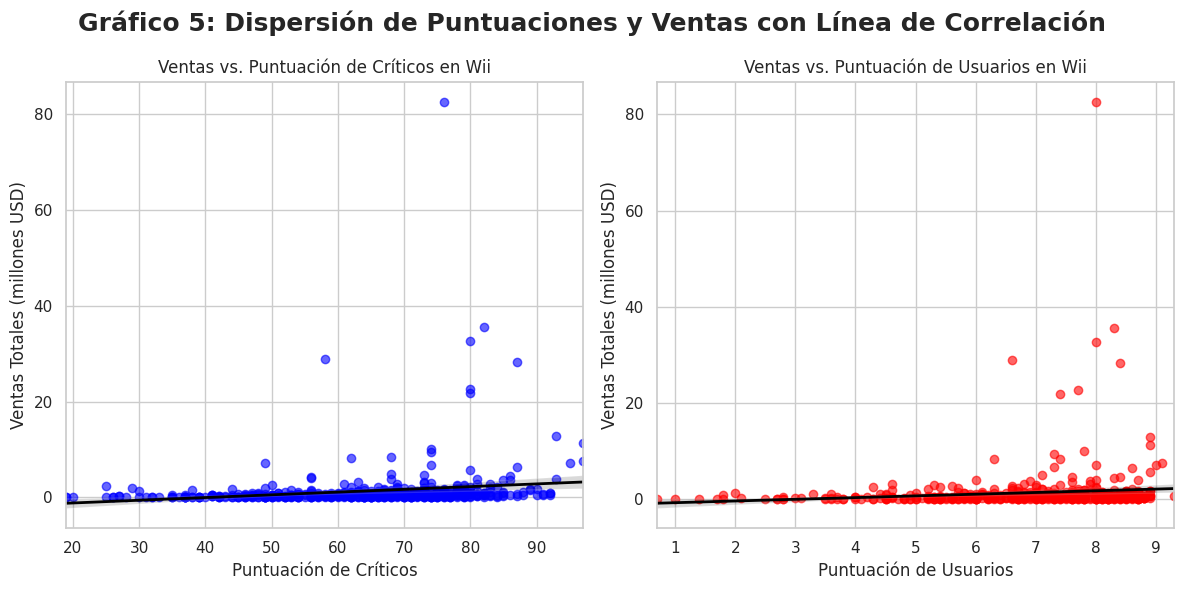


Correlación en la plataforma Wii
Correlación entre ventas y puntuación de críticos: 0.17
Correlación entre ventas y puntuación de usuarios: 0.11


In [14]:
# Gráfico 5: dispersión de reseñas y ventas y línea de correlación
popular_platform = 'Wii'
platform_data = df[df['platform'] == popular_platform]
# Eliminar las filas con nulos para el cálculo de la correlación
platform_data_cleaned = platform_data.dropna(subset=['critic_score', 'user_score', 'total_sales'])

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de dispersión con línea de regresión: Ventas vs. Puntuación de Críticos
sns.regplot(x='critic_score', y='total_sales', data=platform_data_cleaned, ax=axes[0], scatter_kws={'color': 'blue', 'alpha': 0.6},
    line_kws={'color': 'black', 'linewidth': 2}
)
axes[0].set_title(f'Ventas vs. Puntuación de Críticos en {popular_platform}')
axes[0].set_xlabel('Puntuación de Críticos')
axes[0].set_ylabel('Ventas Totales (millones USD)')

# Gráfico de dispersión con línea de regresión: Ventas vs. Puntuación de Usuarios
sns.regplot(x='user_score', y='total_sales', data=platform_data_cleaned, ax=axes[1], scatter_kws={'color': 'red', 'alpha': 0.6},
    line_kws={'color': 'black', 'linewidth': 2}
)
axes[1].set_title(f'Ventas vs. Puntuación de Usuarios en {popular_platform}')
axes[1].set_xlabel('Puntuación de Usuarios')
axes[1].set_ylabel('Ventas Totales (millones USD)')

fig.suptitle('Gráfico 5: Dispersión de Puntuaciones y Ventas con Línea de Correlación',
             fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Calcular coreficiente de correlación
corr_critico = platform_data_cleaned['critic_score'].corr(platform_data_cleaned['total_sales'])
corr_usuario = platform_data_cleaned['user_score'].corr(platform_data_cleaned['total_sales'])

print(f"\nCorrelación en la plataforma {popular_platform}")
print(f"Correlación entre ventas y puntuación de críticos: {corr_critico:.2f}")
print(f"Correlación entre ventas y puntuación de usuarios: {corr_usuario:.2f}")


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buena manera de mostrar la correlación entre las ventas y las reseñas, como bien mencionas la correlación es debil-moderada por lo que no siempre las buenas reseñas van a implicar un gran numero de ventas
</div>


# Las graficas se ven similares, hay un outliner en 80 ventas total aprox, 
# lo que se diferente es la escala de ambas puntuaciónes, sin embargo,
# parecen tener la misma distribución. La correlación entre  ventas y 
# la puntuación para cada una es menor a 0.2 , lo cual es una correlacion positiva débil entre las ventas y la puntuación.
# Se podría mejorar el análisis si eliminamos los valores atípicosde las ventas superiores de 20 a 90 aprox, 
# para sacar una correlación del promedio de los datos de ventas.
 

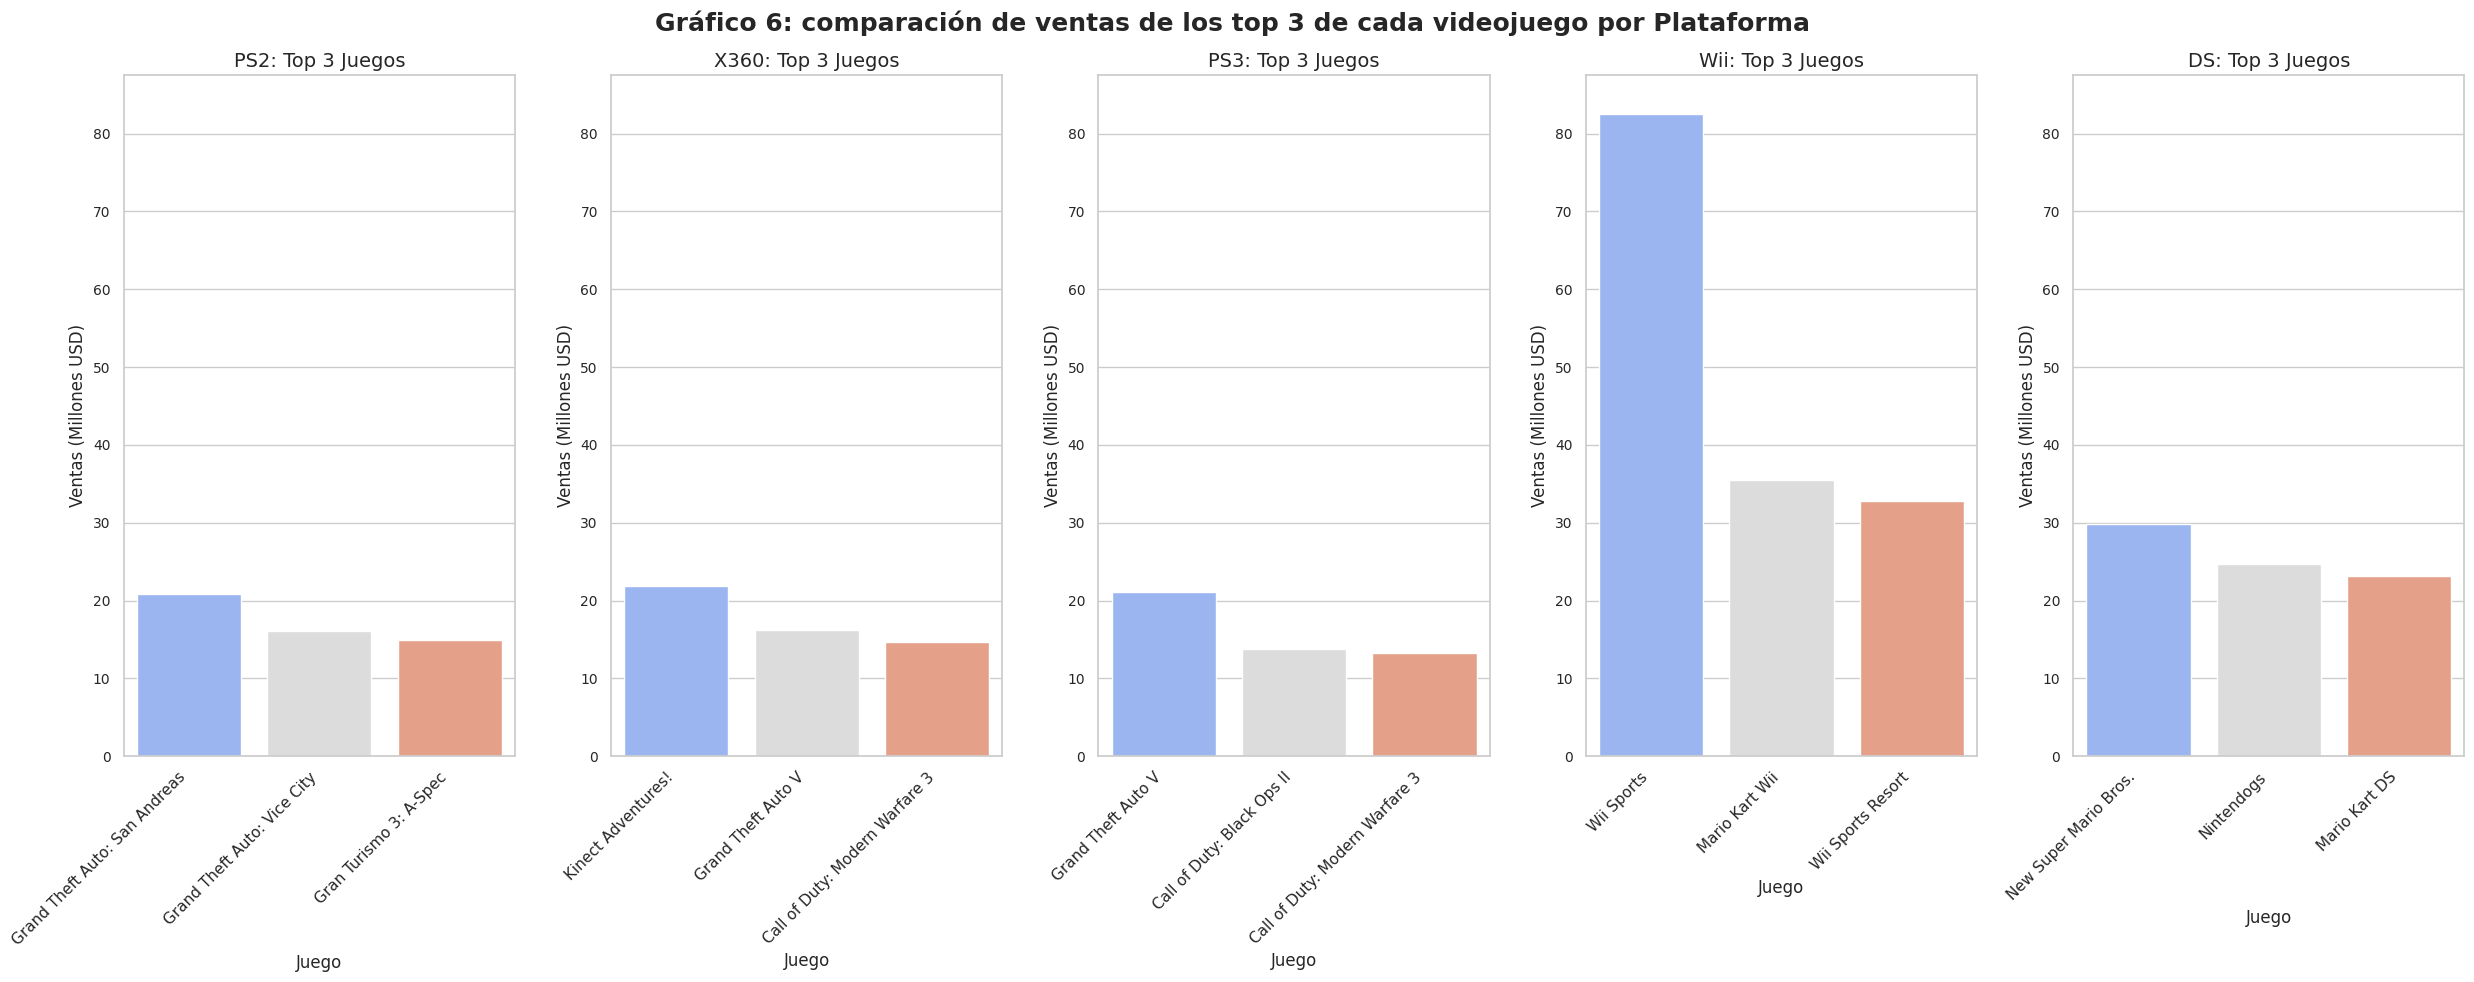

In [15]:
# Gráfico 6: comparación de ventas de los top 3 de cada videojuego por Plataforma
# Seleccionar las 5 plataformas
top5_platforms = ventas_por_plataforma.head(5).index.tolist() 

def get_top_3_games(group):
    return group.sort_values(by='total_sales', ascending=False).head(3)

# Filtrar para las top 5 plataformas
df_top_5 = df[df['platform'].isin(top5_platforms)]
df_top_games = df_top_5.groupby('platform').apply(get_top_3_games).reset_index(drop=True)

# Crear 5 subgráficos
max_sales = df_top_games['total_sales'].max()
fig, axes = plt.subplots(1, 5, figsize=(25, 10))

# Iterar sobre las 5 plataformas
for i, platform in enumerate(top5_platforms):
    # Filtrar los datos para la plataforma actual
    data_platform = df_top_games[df_top_games['platform'] == platform]

    # Crear el gráfico de barras para esta plataforma en el eje actual
    sns.barplot(
        x='name',
        y='total_sales',
        data=data_platform,
        ax=axes[i],
        palette='coolwarm',
        # Ordenamos los juegos dentro de cada subgráfico
        order=data_platform.sort_values(by='total_sales', ascending=False)['name']
    )
    

    # Configuración del subgráfico
    axes[i].set_ylim(0, max_sales + 5) 
    axes[i].set_title(f'{platform}: Top 3 Juegos', fontsize=14)
    axes[i].set_xlabel('Juego', fontsize=12)
    axes[i].set_ylabel('Ventas (Millones USD)', fontsize=12)
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')  
    axes[i].tick_params(axis='y', labelsize=10)

fig.suptitle('Gráfico 6: comparación de ventas de los top 3 de cada videojuego por Plataforma', 
             fontsize=18, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buena manera de mostrar los resultados, pdemos ver como los usuarios tienen preferencias por algunos videojuegos en ciertas plataformas, lo que nos ayuda a entender mejor al mercado
</div>


# Se observa que en la plataforma Wii, el juego Wii Sports se vendío más que otros juegos en otras plataformas.
# Ningún videojuego se repite en el top 3, pero hay diferentes versiones de un mismo videojuego.
# Grand Theft Auto en sus diferentes versiones se repite en los primeros dos lugares con ventas entre 15 y 20 millones USD.
# en la plaforma PS2 y PS3, sin embargo, en la plataforma X360 quedo en segundo, seguido del primer lugar Kinect Adventure! con 20 millones USD de ventas.
# Gran turismo en tercer lugar en PS2. Call of duty, este en tercer lugar en X360, en segundo y tercer lugar en PS3.
# Wii sports en primer y tercer  lugar en la plata forma Wii con ventas entre 30 y 80 millones USD.
# Mario kart esta en segundo lugar en Wii, y en tercer lugar en DS, con ventas entre 20 a 30 millones USD.
# New super mario bros fue el más vendido en la plataforma DS con 30 millones USD de ventas, después Nintendogs con aprox 25 millones USD.


====CONTEO DE VIDEOJUEGOS POR GÉNERO====
genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Unknown            2
Name: name, dtype: int64

====VENTAS TOTALES POR GÉNERO (millones USD)====
genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Unknown            2.42
Name: total_sales, dtype: float64


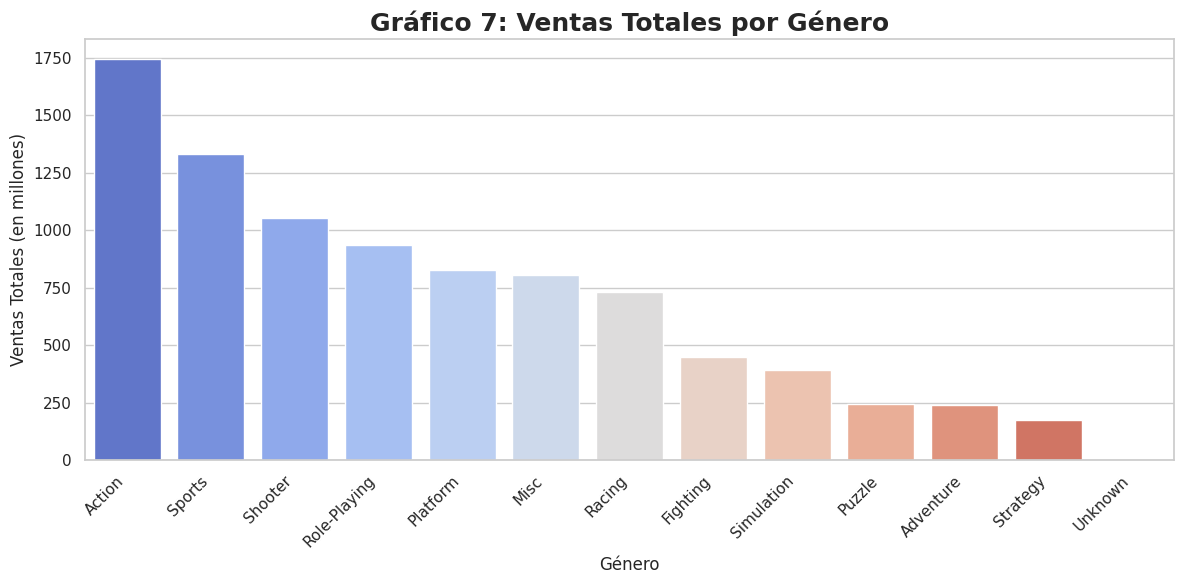

In [16]:
# Gráfico 7: distribución general de los juegos por género

juegos_por_genero = df.groupby('genre')['name'].count().sort_values(ascending=False)
print("\n====CONTEO DE VIDEOJUEGOS POR GÉNERO====")
print(juegos_por_genero)

ventas_por_genero = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print("\n====VENTAS TOTALES POR GÉNERO (millones USD)====")
print(ventas_por_genero)

plt.figure(figsize=(12, 6))
sns.barplot(x=ventas_por_genero.index, y=ventas_por_genero.values, palette='coolwarm')
plt.title('Gráfico 7: Ventas Totales por Género', fontsize=18, fontweight='bold')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buena manera de presentar los datos, podemos ver claramente cuales son los géneros preferidos de las personas, las observaciones que haces me parecen buenas también
</div>


# En el gráfico 7, se determina que el género Action tuvo más ventas, 1750 millones USD, después
# Sports, con ventas aprox de 1350 millones, y en tercer lugar Shooter con aprox 1100 millones USD,
# estos géneros serían los más rentables por tener ventas superiores a 1000 millones USD.
# Los de menor ventas, con menos de 250 millones USD fueron Puzzle, Adventure, y Strategy.
# Unknown tienen ventas insignificantes,se recomendiaría eliminarlas.

In [18]:
# Lista de regiones
regions = ['na_sales', 'eu_sales', 'jp_sales']

print("--- Análisis por Región ---")

# Iterar sobre cada región para realizar los cálculos
for region in regions:
    print(f"\n==================== REGIÓN: {region.upper()} ====================")

    # 1 Plataformas principales (Top 5)
    # Agrupar por plataforma y sumar las ventas en la región actual
    platform_sales = df.groupby('platform')[region].sum().sort_values(ascending=False).head(5)

    print(f"\nTop 5 Plataformas por Ventas en {region.upper()}:")
    # Calcular la cuota de mercado del Top 5
    total_sales_region = platform_sales.sum()
    market_share = (platform_sales / total_sales_region) * 100

    platform_results = pd.DataFrame({
        'Ventas (Millones)': platform_sales.round(2),
        'Cuota de Mercado (%)': market_share.round(2)
    })
    print(platform_results)

    # 2 Géneros principales (Top 5)
    # Agrupar por género y sumar las ventas en la región actual
    genre_sales = df.groupby('genre')[region].sum().sort_values(ascending=False).head(5)

    print(f"\nTop 5 Géneros por Ventas en {region.upper()}:")
    print(genre_sales.round(2))



--- Análisis por Región ---

==================== REGIÓN: NA_SALES ====================

Top 5 Plataformas por Ventas en NA_SALES:
          Ventas (Millones)  Cuota de Mercado (%)
platform                                         
X360                 602.47                 24.50
PS2                  583.84                 23.74
Wii                  496.90                 20.21
PS3                  393.49                 16.00
DS                   382.40                 15.55

Top 5 Géneros por Ventas en NA_SALES:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

==================== REGIÓN: EU_SALES ====================

Top 5 Plataformas por Ventas en EU_SALES:
          Ventas (Millones)  Cuota de Mercado (%)
platform                                         
PS2                  339.29                 23.96
PS3                  330.29                 23.32
X360                 270.76                 1

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Las agrupaciones que haces en los ejercicios me parecen correctas, sin embargo recomiendo acompañar estas tablas con gráficas que resalten las diferencias/similitudes de las regiones
</div>


# Las plataformas con mayor venta en NA es XBOX con 600 millones USD, sienta esta también  la de mayor en las tres regiones.
# En la región NA, se tiene ventas superiores a los 380 millones USD llegando a los 600 millones USD, mientras
# que en la región de EU las ventas fueron entre 210 y 340 millones, siendo la plataforma PS2 la de mayor venta con 340.
# En la región JP las ventas fueron entre 100 y 175 millones, la plataforma DS fue lider en ventas con 175 millones USD.
# La plataforma PS2 estuvo en el top5 de las regiones.

# El género Action tuvo mayor ventas en la región NA,JP y EU, con la mayor cantidad 
# de ventas es de 880 millones USD en NA. El género de mayor ventas en JP fue Role-Playing con 355 millones USD. Las ventas menores fue Misc para todas las regiones.


==================== ANÁLISIS DE RATING ESRB ====================

Ventas Totales por Clasificación ESRB y Región (en Millones):
         na_sales  eu_sales  jp_sales
rating                               
AO           1.26      0.61      0.00
E         1292.99    710.25    198.11
E10+       353.32    188.52     40.20
EC           1.53      0.11      0.00
K-A          2.56      0.27      1.46
M          748.48    483.97     64.24
Missing   1242.46    613.83    841.96
RP           0.00      0.08      0.00
T          759.75    427.03    151.40


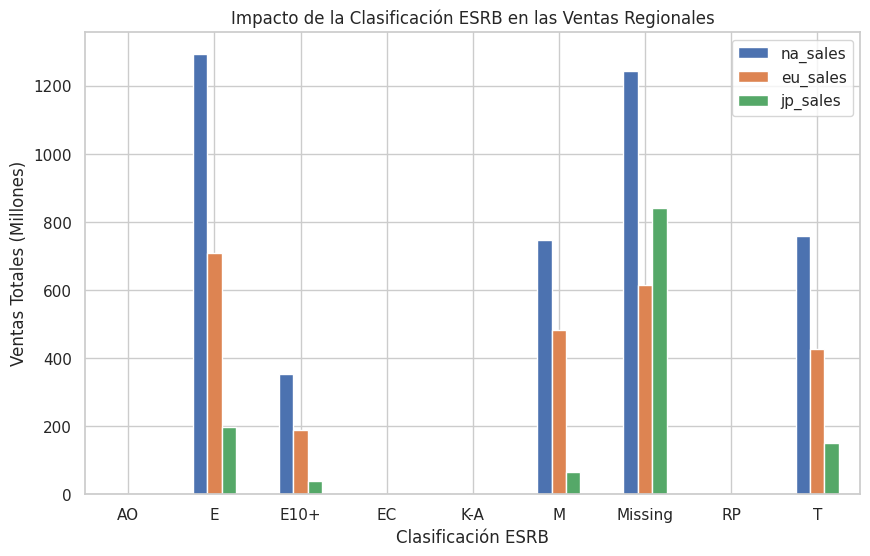

In [19]:
# Análisis de rating
print(f"\n==================== ANÁLISIS DE RATING ESRB ====================")

# Agrupar por Rating y sumar las ventas en todas las regiones
rating_sales = df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

print("\nVentas Totales por Clasificación ESRB y Región (en Millones):")
print(rating_sales.round(2))

# Visualización (Opcional pero recomendable)
rating_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Impacto de la Clasificación ESRB en las Ventas Regionales')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas Totales (Millones)')
plt.xticks(rotation=0)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

Podemos ver las preferencias/diferencias de las regiones ya que se ha utilizado una manera clara de mostrar la información
</div>
.

# Para empezar la columna de Missing tiene una mayor parte de los datos, lo que significa,
# que podría significar que la evaluación sea significativa para el análisis.
# Por otro lado, el rating predomina en la región de NA, en todas las clasificaciones.
# En la clasificación de E, everyone, las ventas en la región NA fueron fueron las de 
# mayor magnitud, cerca de 1300 millones USD. Seguido de la clasificación Missing en la
# región NA, con aprox 1250 millones USD. Ventas similares en esa misma región se observa
# en la clasificación M, mature, y T, teen.
# Las ventas más bajas fueron en E+10 y M, mature en la región de JP. Esto se puede deber,
# porque en la región de JP hay otro sistema de rating.
# El rating en la región de EU es más consistente, entre un rango de 200 a 700 millones USD.

In [20]:
#Paso 5:
#Prueba 1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df_cleaned = df.dropna(subset=['user_score'])
xbox_one_scores = df_cleaned[df_cleaned['platform'] == 'XOne']['user_score']
pc_scores = df_cleaned[df_cleaned['platform'] == 'PC']['user_score']

# Definir el valor de alfa
alpha = 0.05
print(f"Valor de significancia (alpha): {alpha}")

# H0 Hipótesis Nula: Las calificaciones promedio para la plataforma Xbox One y PC son las mismas.
# H1 Hipótesis alternativa: Las calificaciones promedio d¿para la plataforma Xbox One y PC son las mismas.

# Decisión de rechazo:
# Si Valor p<α (0.05),se rechaza la Hipótesis Nula (H0). Concluimos que las medias son estadísticamente diferentes.
# Si Valor p≥α (0.05), no tenemos suficiente evidencia para rechazar la Hipótesis Nula (H0). Concluimos que las medias podrían ser las mismas.

t_stat_1, p_value_1 = st.ttest_ind(xbox_one_scores, pc_scores, equal_var=True)
# Prueba t-student para muestras independientes y asumiendo varianzas iguales.

print("\nResultado de la Prueba t (Xbox One vs PC) ")
print(f"Número de muestras XOne: {len(xbox_one_scores)}, promedio de XOne:{xbox_one_scores.mean()}")
print(f"Número de muestras PC: {len(pc_scores)}, promedio de PC:{pc_scores.mean()}")
print(f"Valor p (P-value): {p_value_1:.5f}")
print(f"Estadístico t: {t_stat_1:.5f}")


Valor de significancia (alpha): 0.05

Resultado de la Prueba t (Xbox One vs PC) 
Número de muestras XOne: 182, promedio de XOne:6.521428571428572
Número de muestras PC: 770, promedio de PC:7.062467532467533
Valor p (P-value): 0.00001
Estadístico t: -4.36833


# Con un valor p menor a 0.05, se rechaza la hipótesis nula, es decir que 
# el promedio de la plataforma Xbox One y PC estadísticamente diferentes.

In [21]:
# Prueba 2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
action_scores = df_cleaned[df_cleaned['genre'] == 'Action']['user_score']
sports_scores = df_cleaned[df_cleaned['genre'] == 'Sports']['user_score']

# Definir el valor de alfa
alpha = 0.05
print(f"Valor de significancia (alpha): {alpha}")

# H0 Hipótesis Nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
# H1 Hipótesis alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

# Decisión de rechazo:
# Si Valor p<α (0.05),se rechaza la Hipótesis Nula (H0). Concluimos que las medias son estadísticamente diferentes.
# Si Valor p≥α (0.05), no tenemos suficiente evidencia para rechazar la Hipótesis Nula (H0). Concluimos que las medias podrían ser las mismas.


t_stat_2, p_value_2 = st.ttest_ind(action_scores, sports_scores, equal_var=True)


print("\nResultado de la Prueba t (Acción vs. Deportes)")
print(f"Número de muestras Acción: {len(action_scores)}, promedio de Acción:{action_scores.mean()}")
print(f"Número de muestras Deportes: {len(sports_scores)}, promedio de Acción:{sports_scores.mean()}")
print(f"Valor p (P-value): {p_value_2:.5f}")
print(f"Estadístico t: {t_stat_2:.5f}")

Valor de significancia (alpha): 0.05

Resultado de la Prueba t (Acción vs. Deportes)
Número de muestras Acción: 1830, promedio de Acción:7.054043715846995
Número de muestras Deportes: 1103, promedio de Acción:6.961196736174069
Valor p (P-value): 0.10407
Estadístico t: 1.62594


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />


El planteamiento de la hipótesis me parece correcto en ambos casos, bien hecho!
</div>


# Con un valor p mayor a 0.05, no hay evidencia suficiente para rechazar la hipótesis nula, es decir que 
# el promedio del género Acción y Deportes son iguales.

# Paso 6:
# El análisis de la distribución de lanzamientos y ventas por año confirma que la industria de los videojuegos alcanzó su pico de producción y ventas entre 2007 y 2011. Este período de auge es crucial para entender el mercado, ya que muestra el ciclo de vida típico de una plataforma: las ventas alcanzan su pico máximo aproximadamente 2-3 años después del lanzamiento y luego disminuyen drásticamente.

# El diagrama de caja y el análisis de los juegos más vendidos revelan que la mayoría de los juegos tienen ventas modestas (con una mediana inferior a 0.25 millones de USD). El top 3 juegos por plataforma confirma que estos videojuegos, a menudo parte de franquicias como Grand Theft Auto, Mario Bros y Wii Sports, son los principales líderes de ventas.

# El análisis regional demostró que el perfil del usuario cambia significativamente entre Norteamérica (NA), Europa (UE) y Japón (JP). NA y UE comparten una fuerte preferencia por plataformas de consola como PlayStation (PS2, PS3, PS4) y Xbox, también géneros como Action y Shooter. La clasificación de juegos para adultos (Rating M) también es un factor clave en estas regiones. JP muestra una clara preferencia por plataformas como DS, PS y SNES; y domina en el género Role-Playing. El sistema de clasificación ESRB es menos relevante aquí.

# La correlación entre las ventas y las calificaciones de usuarios y críticos resultó ser débil, con un valor de correlación positivo pero muy bajo para la plataforma Wii. Esto sugiere que, aunque un juego sea bien recibido, otros factores (como la publicidad, la exclusividad de la plataforma y el tamaño de la base de usuarios) son más influyentes en el éxito comercial.

# La prueba de hipótesis reveló que las calificaciones promedio de los usuarios para Xbox One y PC son estadísticamente diferentes, lo que podría sugerir audiencias con gustos distintos. Por otro lado, la similitud en las calificaciones entre los géneros Acción y Deportes implica que los jugadores tienen expectativas de calidad similares, a pesar de las diferencias en el género.


## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, las observaciones que has hecho durante todo el ejercicio me han parecido bastante buenas, son un gran apoyo a la hora de revisar el proyecto ya que me dan a entender que el tema te ha quedado claro y has podido avanzar correctamente.

    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>

<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias, así como las conclusiones finales me parecen buenas
- Las graficas utilizadas me parecen del tipo correcto
- El proyecto esta ordenado
    
</div>

<div class="alert alert-block alert-warning">
<b>Aspectos que pueden mejorar del proyecto</b> <a class="tocSkip"></a><br />

- Se pueden incluir más graficas para resaltar las observaciones o datos que muestras, especialmente en la parte donde se comparan las distintas regiones del mundo
- Recomiendo hacer cambios en el como se escriben las observaciones, actualmente se utiliza `#` para hacer los comentarios, pero es importante saber que este simbolo se utiliza solo para los titulos, esta es la razón por la cual las observaciones se ven grandes, recomiendo revisar un poco la nomenclatura de markdown para que la parte escrita pueda mejorar visualmente
</div>


